<a href="https://colab.research.google.com/github/fhallatu/2_version-control-and-branch-management-git/blob/main/Soyaland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import accuracy_score

# **Data Preparation**

## **Import Data**

In [1290]:
path_dataset = "/content/drive/MyDrive/Data Used/Data Bengkulu Tengah (used).csv"
df_benteng = pd.read_csv(path_dataset, sep=';')
df_benteng

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Talang Empat,Bengkulu Tengah,Bengkulu,26.07,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,S3
1,1,2,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.07,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,S3
2,2,3,Talang Empat,Bengkulu Tengah,Bengkulu,26.23,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,S3
3,2,4,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.23,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,S3
4,3,5,Pematang Tiga,Bengkulu Tengah,Bengkulu,25.77,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,2.90,3,Sangat Ringan,N,S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,27,67,Merigi Kelindang,Bengkulu Tengah,Bengkulu,20.45,2655,83.51,7,Agak Baik,...,55.14,5.08,0.29,0.11,6.13,0.11,40,Berat,N,N
67,27,68,Taba Penanjung,Bengkulu Tengah,Bengkulu,20.45,3799,83.51,9,Agak Baik,...,55.14,5.08,0.29,0.11,6.13,0.11,40,Berat,N,N
68,28,69,Merigi Sakti,Bengkulu Tengah,Bengkulu,25.25,3147,83.51,8,Agak Baik,...,55.14,5.08,0.29,0.11,6.13,0.11,25,Sedang,N,S3
69,29,70,Pagar Jati,Bengkulu Tengah,Bengkulu,22.47,880,83.51,2,Agak Baik,...,55.14,5.08,0.29,0.11,6.13,0.11,40,Berat,N,N


In [1291]:
df_benteng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       71 non-null     int64  
 1   No.                71 non-null     int64  
 2   Kecamatan          71 non-null     object 
 3   Kabupaten / Kota   71 non-null     object 
 4   Provinsi           71 non-null     object 
 5   temperatur_rerata  71 non-null     float64
 6   curah_hujan        71 non-null     int64  
 7   kelembaban         71 non-null     float64
 8   bulan_basah        71 non-null     int64  
 9   drainase           71 non-null     object 
 10  tekstur            71 non-null     object 
 11  kedalaman_tanah    71 non-null     int64  
 12  ktk_tanah          71 non-null     float64
 13  kejenuhan_basa     71 non-null     float64
 14  ph_h2o             71 non-null     float64
 15  c_organik          71 non-null     float64
 16  n_total            71 non-nu

In [1292]:
path_dataset = "/content/drive/MyDrive/Data Used/Data Kepahiang (used).csv"
df_kepahiang = pd.read_csv(path_dataset, sep=';')
df_kepahiang

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Bermani Ilir,Kepahiang,Bengkulu,23.83,1807,87.42,3,Agak Baik,...,27.91,6.48,6.20,1.22,7.90,56.53,10,Tidak Diketahui,N,S3
1,2,2,Seberang Musi,Kepahiang,Bengkulu,22.68,1749,87.42,4,Baik,...,37.42,5.03,1.32,0.37,6.47,16.81,3,Tidak Diketahui,S3,S2
2,2,3,Tebat Karai,Kepahiang,Bengkulu,22.68,1584,87.42,4,Baik,...,37.42,5.03,1.32,0.37,6.47,16.81,3,Tidak Diketahui,S3,S2
3,3,4,Kabawetan,Kepahiang,Bengkulu,23.83,3108,87.42,8,Agak Baik,...,27.91,6.48,6.20,1.22,7.90,56.53,10,Tidak Diketahui,N,S3
4,4,5,Kabawetan,Kepahiang,Bengkulu,22.00,3108,87.42,8,Terhambat,...,22.40,6.73,2.40,0.46,13.89,22.12,6,Tidak Diketahui,N,S3
5,5,6,Kabawetan,Kepahiang,Bengkulu,19.47,3108,87.42,8,Agak Terhambat,...,15.67,6.48,3.94,0.44,5.89,11.33,30,Tidak Diketahui,N,S3
6,6,7,Ujan Mas,Kepahiang,Bengkulu,21.53,3873,87.42,8,Agak Terhambat,...,41.28,6.27,1.42,0.34,6.34,37.98,20,Tidak Diketahui,N,S3
7,7,8,Kabawetan,Kepahiang,Bengkulu,19.47,3108,87.42,8,Agak Terhambat,...,15.67,6.48,3.94,0.44,5.89,11.33,30,Tidak Diketahui,N,S3
8,8,9,Kabawetan,Kepahiang,Bengkulu,19.47,3108,87.42,8,Agak Terhambat,...,15.67,6.48,3.94,0.44,5.89,11.33,30,Tidak Diketahui,N,S3
9,9,10,Kepahiang,Kepahiang,Bengkulu,22.00,3020,87.42,8,Terhambat,...,27.92,6.66,1.31,0.29,12.34,28.04,6,Tidak Diketahui,N,S3


In [1293]:
df_kepahiang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       32 non-null     int64  
 1   No.                32 non-null     int64  
 2   Kecamatan          32 non-null     object 
 3   Kabupaten / Kota   32 non-null     object 
 4   Provinsi           32 non-null     object 
 5   temperatur_rerata  32 non-null     float64
 6   curah_hujan        32 non-null     int64  
 7   kelembaban         32 non-null     float64
 8   bulan_basah        32 non-null     int64  
 9   drainase           32 non-null     object 
 10  tekstur            32 non-null     object 
 11  kedalaman_tanah    32 non-null     int64  
 12  ktk_tanah          32 non-null     float64
 13  kejenuhan_basa     32 non-null     float64
 14  ph_h2o             32 non-null     float64
 15  c_organik          32 non-null     float64
 16  n_total            32 non-nu

In [1294]:
path_dataset = "/content/drive/MyDrive/Data Used/Data Lebong (used).csv"
df_lebong = pd.read_csv(path_dataset, sep=';')
df_lebong

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Topos,Lebong,Bengkulu,24.50,2616,84.7,5,Agak Cepat,...,13.90,6.50,1.78,0.43,5,3,3,Tidak Diketahui,N,S3
1,2,2,Pinang Belapis,Lebong,Bengkulu,24.50,1720,84.7,8,Agak Cepat,...,23.37,6.00,1.08,0.47,4,3,3,Tidak Diketahui,S3,S2
2,3,3,Pinang Belapis,Lebong,Bengkulu,23.44,1720,84.7,8,Agak Terhambat,...,20.67,6.49,0.58,0.28,4,4,6,Tidak Diketahui,S3,S2
3,4,4,Bingin Kuning,Lebong,Bengkulu,20.64,2697,84.7,6,Agak Cepat,...,34.50,5.80,4.15,0.40,4,3,3,Tidak Diketahui,N,S3
4,5,5,Topos,Lebong,Bengkulu,21.73,2616,84.7,5,Agak Terhambat,...,30.92,5.39,1.38,0.22,3,3,15,Tidak Diketahui,N,S3
5,5,6,Pinang Belapis,Lebong,Bengkulu,21.73,1720,84.7,8,Agak Terhambat,...,30.92,5.39,1.38,0.22,3,3,15,Tidak Diketahui,S3,S2
6,6,7,Lebong Sakti,Lebong,Bengkulu,24.10,2890,84.7,6,Agak Cepat,...,25.09,6.22,0.36,0.33,4,3,3,Tidak Diketahui,N,S3
7,7,8,Pinang Belapis,Lebong,Bengkulu,21.73,1720,84.7,8,Agak Terhambat,...,31.46,4.50,1.46,0.27,4,3,25,Tidak Diketahui,N,S3
8,7,9,Topos,Lebong,Bengkulu,21.73,2616,84.7,5,Agak Terhambat,...,31.46,4.50,1.46,0.27,4,3,25,Tidak Diketahui,N,S3
9,8,10,Rimbo Pegadang,Lebong,Bengkulu,24.50,3023,84.7,6,Agak Terhambat,...,16.51,5.81,1.05,0.39,4,3,40,Tidak Diketahui,N,N


In [1295]:
df_lebong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       60 non-null     int64  
 1   No.                60 non-null     int64  
 2   Kecamatan          60 non-null     object 
 3   Kabupaten / Kota   60 non-null     object 
 4   Provinsi           60 non-null     object 
 5   temperatur_rerata  60 non-null     float64
 6   curah_hujan        60 non-null     int64  
 7   kelembaban         60 non-null     float64
 8   bulan_basah        60 non-null     int64  
 9   drainase           60 non-null     object 
 10  tekstur            60 non-null     object 
 11  kedalaman_tanah    60 non-null     int64  
 12  ktk_tanah          60 non-null     float64
 13  kejenuhan_basa     60 non-null     float64
 14  ph_h2o             60 non-null     float64
 15  c_organik          60 non-null     float64
 16  n_total            60 non-nu

In [1296]:
path_dataset = "/content/drive/MyDrive/Data Used/Data Mukomuko (used).csv"
df_mukomuko = pd.read_csv(path_dataset, sep=';')
df_mukomuko

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Air Dikit,Mukomuko,Bengkulu,26.04,1321,68.5,5,Agak Cepat,...,34.35,5.83,0.68,0.12,26.19,8.13,1,Sangat Ringan,S3,S2
1,1,2,Malin Deman,Mukomuko,Bengkulu,26.04,2586,68.5,7,Agak Cepat,...,34.35,5.83,0.68,0.12,26.19,8.13,1,Sangat Ringan,N,S3
2,2,3,Ipuh,Mukomuko,Bengkulu,26.08,3279,68.5,8,Agak Baik,...,47.48,5.14,1.24,0.22,126.61,35.71,3,Sangat Ringan,N,S3
3,3,4,XIV Koto,Mukomuko,Bengkulu,26.15,2586,68.5,7,Agak Cepat,...,61.24,5.16,1.99,0.19,308.07,19.98,1,Sangat Ringan,N,S3
4,3,5,Lubuk Pinang,Mukomuko,Bengkulu,26.15,2489,68.5,5,Agak Cepat,...,61.24,5.16,1.99,0.19,308.07,19.98,1,Sangat Ringan,N,S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,29,80,Selagan Raya,Mukomuko,Bengkulu,22.44,1625,68.5,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
80,29,81,Penarik,Mukomuko,Bengkulu,22.44,2772,68.5,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
81,29,82,Malin Deman,Mukomuko,Bengkulu,22.44,2586,68.5,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
82,30,83,Pondok Suguh,Mukomuko,Bengkulu,17.75,2708,68.5,7,Agak Terhambat,...,0.00,5.72,3.30,0.00,17.50,9.00,40,Sedang,N,N


In [1297]:
df_mukomuko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       84 non-null     int64  
 1   No.                84 non-null     int64  
 2   Kecamatan          84 non-null     object 
 3   Kabupaten / Kota   84 non-null     object 
 4   Provinsi           84 non-null     object 
 5   temperatur_rerata  84 non-null     float64
 6   curah_hujan        84 non-null     int64  
 7   kelembaban         84 non-null     float64
 8   bulan_basah        84 non-null     int64  
 9   drainase           84 non-null     object 
 10  tekstur            84 non-null     object 
 11  kedalaman_tanah    84 non-null     int64  
 12  ktk_tanah          84 non-null     float64
 13  kejenuhan_basa     84 non-null     float64
 14  ph_h2o             84 non-null     float64
 15  c_organik          84 non-null     float64
 16  n_total            84 non-nu

## **Data Integration**

### Penggabungan Dataframe

In [1298]:
frames = [df_benteng,df_kepahiang,df_lebong,df_mukomuko]
df = pd.concat(frames).reset_index(drop=True)
df

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Talang Empat,Bengkulu Tengah,Bengkulu,26.07,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,S3
1,1,2,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.07,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,S3
2,2,3,Talang Empat,Bengkulu Tengah,Bengkulu,26.23,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,S3
3,2,4,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.23,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,S3
4,3,5,Pematang Tiga,Bengkulu Tengah,Bengkulu,25.77,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.90,2.90,3,Sangat Ringan,N,S3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,29,80,Selagan Raya,Mukomuko,Bengkulu,22.44,1625,68.50,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
243,29,81,Penarik,Mukomuko,Bengkulu,22.44,2772,68.50,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
244,29,82,Malin Deman,Mukomuko,Bengkulu,22.44,2586,68.50,7,Agak Terhambat,...,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,N
245,30,83,Pondok Suguh,Mukomuko,Bengkulu,17.75,2708,68.50,7,Agak Terhambat,...,0.00,5.72,3.30,0.00,17.50,9.00,40,Sedang,N,N


In [1299]:
df.head()

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
0,1,1,Talang Empat,Bengkulu Tengah,Bengkulu,26.07,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.9,0.09,3,Sangat Ringan,N,S3
1,1,2,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.07,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.9,0.09,3,Sangat Ringan,N,S3
2,2,3,Talang Empat,Bengkulu Tengah,Bengkulu,26.23,3025,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.9,0.09,1,Sangat Ringan,N,S3
3,2,4,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.23,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.9,0.09,1,Sangat Ringan,N,S3
4,3,5,Pematang Tiga,Bengkulu Tengah,Bengkulu,25.77,2655,83.51,7,Agak Cepat,...,53.11,5.42,1.25,0.18,2.9,2.90,3,Sangat Ringan,N,S3


In [1300]:
df.tail()

,Mapping Unit,No.,Kecamatan,Kabupaten / Kota,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,...,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,kelas_potensial
242,29,80,Selagan Raya,Mukomuko,Bengkulu,22.44,1625,68.5,7,Agak Terhambat,...,23.69,5.14,0.0,0.18,9.15,8.21,41,Berat,N,N
243,29,81,Penarik,Mukomuko,Bengkulu,22.44,2772,68.5,7,Agak Terhambat,...,23.69,5.14,0.0,0.18,9.15,8.21,41,Berat,N,N
244,29,82,Malin Deman,Mukomuko,Bengkulu,22.44,2586,68.5,7,Agak Terhambat,...,23.69,5.14,0.0,0.18,9.15,8.21,41,Berat,N,N
245,30,83,Pondok Suguh,Mukomuko,Bengkulu,17.75,2708,68.5,7,Agak Terhambat,...,0.00,5.72,3.3,0.00,17.50,9.00,40,Sedang,N,N
246,31,84,Sungai Rumbai,Mukomuko,Bengkulu,17.90,2586,68.5,7,Agak Terhambat,...,0.00,5.72,2.3,0.00,17.50,9.00,41,Berat,N,N


In [1301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       247 non-null    int64  
 1   No.                247 non-null    int64  
 2   Kecamatan          247 non-null    object 
 3   Kabupaten / Kota   247 non-null    object 
 4   Provinsi           247 non-null    object 
 5   temperatur_rerata  247 non-null    float64
 6   curah_hujan        247 non-null    int64  
 7   kelembaban         247 non-null    float64
 8   bulan_basah        247 non-null    int64  
 9   drainase           247 non-null    object 
 10  tekstur            247 non-null    object 
 11  kedalaman_tanah    247 non-null    int64  
 12  ktk_tanah          247 non-null    float64
 13  kejenuhan_basa     247 non-null    float64
 14  ph_h2o             247 non-null    float64
 15  c_organik          247 non-null    float64
 16  n_total            247 non

## **Data Cleaning**

### **Menghapus Column yang Tidak Diperlukan**

In [1302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mapping Unit       247 non-null    int64  
 1   No.                247 non-null    int64  
 2   Kecamatan          247 non-null    object 
 3   Kabupaten / Kota   247 non-null    object 
 4   Provinsi           247 non-null    object 
 5   temperatur_rerata  247 non-null    float64
 6   curah_hujan        247 non-null    int64  
 7   kelembaban         247 non-null    float64
 8   bulan_basah        247 non-null    int64  
 9   drainase           247 non-null    object 
 10  tekstur            247 non-null    object 
 11  kedalaman_tanah    247 non-null    int64  
 12  ktk_tanah          247 non-null    float64
 13  kejenuhan_basa     247 non-null    float64
 14  ph_h2o             247 non-null    float64
 15  c_organik          247 non-null    float64
 16  n_total            247 non

In [1303]:
df.drop(["Mapping Unit","No.","Kecamatan","Kabupaten / Kota","Provinsi","kelas_potensial"], axis=1, inplace=True)

In [1304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1305]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,26.07,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N
1,26.07,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N
2,26.23,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N
3,26.23,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N
4,25.77,2655,83.51,7,Agak Cepat,Lempung liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,2.90,3,Sangat Ringan,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N
243,22.44,2772,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N
244,22.44,2586,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N
245,17.75,2708,68.50,7,Agak Terhambat,Liat berpasir,120,0.00,0.00,5.72,3.30,0.00,17.50,9.00,40,Sedang,N


In [1306]:
df.shape

(247, 17)

### **Menangani Missing Value**

In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1308]:
df.isna().sum()

temperatur_rerata    0
curah_hujan          0
kelembaban           0
bulan_basah          0
drainase             0
tekstur              0
kedalaman_tanah      0
ktk_tanah            0
kejenuhan_basa       0
ph_h2o               0
c_organik            0
n_total              0
p2o5                 0
k2o                  0
lereng               0
bahaya_erosi         0
label_evaluasi       0
dtype: int64

In [1309]:
df['bahaya_erosi'] = df['bahaya_erosi'].fillna("Tidak Diketahui")
df['bahaya_erosi'].isna().sum()

0

In [1310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

### **Membuat Kelas Baru**

**Kelas Drainase**

In [1311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1312]:
df['drainase']

0          Agak Cepat
1          Agak Cepat
2          Agak Cepat
3          Agak Cepat
4          Agak Cepat
            ...      
242    Agak Terhambat
243    Agak Terhambat
244    Agak Terhambat
245    Agak Terhambat
246    Agak Terhambat
Name: drainase, Length: 247, dtype: object

In [1313]:
def drainase_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Cepat": return 1
  if x=="Agak Cepat": return 2
  if x=="Baik": return 3
  if x=="Agak Baik": return 4
  if x=="Agak Terhambat": return 5
  if x=="Terhambat": return 6
  if x=="Sangat Terhambat": return 7

df['drainase_num'] = df['drainase'].apply(drainase_to_numeric)
df[['drainase','drainase_num']]

,drainase,drainase_num
0,Agak Cepat,2
1,Agak Cepat,2
2,Agak Cepat,2
3,Agak Cepat,2
4,Agak Cepat,2
...,...,...
242,Agak Terhambat,5
243,Agak Terhambat,5
244,Agak Terhambat,5
245,Agak Terhambat,5


In [1314]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi,drainase_num
0,26.07,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,2
1,26.07,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,3,Sangat Ringan,N,2
2,26.23,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,2
3,26.23,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,0.09,1,Sangat Ringan,N,2
4,25.77,2655,83.51,7,Agak Cepat,Lempung liat berdebu,100,61.09,53.11,5.42,1.25,0.18,2.90,2.90,3,Sangat Ringan,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,5
243,22.44,2772,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,5
244,22.44,2586,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,0.00,0.18,9.15,8.21,41,Berat,N,5
245,17.75,2708,68.50,7,Agak Terhambat,Liat berpasir,120,0.00,0.00,5.72,3.30,0.00,17.50,9.00,40,Sedang,N,5


In [1315]:
df[['drainase','drainase_num']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   drainase      247 non-null    object
 1   drainase_num  247 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


**Kelas Tekstur**

In [1316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1317]:
df['tekstur']

0              Liat berdebu
1              Liat berdebu
2              Liat berdebu
3              Liat berdebu
4      Lempung liat berdebu
               ...         
242                    Liat
243                    Liat
244                    Liat
245           Liat berpasir
246           Liat berpasir
Name: tekstur, Length: 247, dtype: object

In [1318]:
def tekstur_class(x):
  if x=="Liat berpasir" or x=="Liat" or x=="Liat berdebu": return "Halus"
  if x=="Lempung berliat" or x=="Lempung liat berpasir" or x=="Lempung liat berdebu": return "Agak Halus"
  if x=="Lempung berpasir sangat halus" or x=="Lempung" or x=="Lempung berdebu" or x=="Debu": return "Sedang"
  if x=="Lempung berpasir": return "Agak Kasar"
  if x=="Pasir" or x=="Pasir berlempung": return "Kasar"
  if x=="Liat (tipe mineral liat 2:1)": return "Sangat Halus"

df['tekstur_class'] = df['tekstur'].apply(tekstur_class)
df[["tekstur", "tekstur_class"]]

,tekstur,tekstur_class
0,Liat berdebu,Halus
1,Liat berdebu,Halus
2,Liat berdebu,Halus
3,Liat berdebu,Halus
4,Lempung liat berdebu,Agak Halus
...,...,...
242,Liat,Halus
243,Liat,Halus
244,Liat,Halus
245,Liat berpasir,Halus


In [1319]:
def tekstur_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Halus": return 1
  if x=="Agak Halus": return 2
  if x=="Sedang": return 3
  if x=="Agak Kasar": return 4
  if x=="Kasar": return 5
  if x=="Sangat Halus": return 6


df['tekstur_num'] = df['tekstur_class'].apply(tekstur_to_numeric)
df[['tekstur','tekstur_class','tekstur_num']]

,tekstur,tekstur_class,tekstur_num
0,Liat berdebu,Halus,1
1,Liat berdebu,Halus,1
2,Liat berdebu,Halus,1
3,Liat berdebu,Halus,1
4,Lempung liat berdebu,Agak Halus,2
...,...,...,...
242,Liat,Halus,1
243,Liat,Halus,1
244,Liat,Halus,1
245,Liat berpasir,Halus,1


In [1320]:
df[['tekstur','tekstur_class','tekstur_num']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tekstur        247 non-null    object
 1   tekstur_class  247 non-null    object
 2   tekstur_num    247 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


**Kelas N Total**

In [1321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1322]:
df['n_total']

0      0.18
1      0.18
2      0.18
3      0.18
4      0.18
       ... 
242    0.18
243    0.18
244    0.18
245    0.00
246    0.00
Name: n_total, Length: 247, dtype: float64

In [1323]:
def n_total_class(x):
  if x<0.10: return "Sangat Rendah"
  if x>=0.10 and x<=0.20: return "Rendah"
  if x>=0.21 and x<=0.50: return "Sedang"
  if x>=0.51 and x<=0.75: return "Tinggi"
  if x>0.75: return "Sangat Tinggi"

df['n_total_class'] = df['n_total'].apply(n_total_class)
df[["n_total", "n_total_class"]]

,n_total,n_total_class
0,0.18,Rendah
1,0.18,Rendah
2,0.18,Rendah
3,0.18,Rendah
4,0.18,Rendah
...,...,...
242,0.18,Rendah
243,0.18,Rendah
244,0.18,Rendah
245,0.00,Sangat Rendah


In [1324]:
def n_total_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Sangat Rendah": return 1
  if x=="Rendah": return 2
  if x=="Sedang": return 3
  if x=="Tinggi": return 4
  if x=="Sangat Tinggi": return 5

df['n_total_num'] = df['n_total_class'].apply(n_total_to_numeric)
df[["n_total", "n_total_class", "n_total_num"]]

,n_total,n_total_class,n_total_num
0,0.18,Rendah,2
1,0.18,Rendah,2
2,0.18,Rendah,2
3,0.18,Rendah,2
4,0.18,Rendah,2
...,...,...,...
242,0.18,Rendah,2
243,0.18,Rendah,2
244,0.18,Rendah,2
245,0.00,Sangat Rendah,1


In [1325]:
df[["n_total", "n_total_class", "n_total_num"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   n_total        247 non-null    float64
 1   n_total_class  247 non-null    object 
 2   n_total_num    247 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


**Kelas P2O5**

In [1326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1327]:
df['p2o5']

0       2.90
1       2.90
2       2.90
3       2.90
4       2.90
       ...  
242     9.15
243     9.15
244     9.15
245    17.50
246    17.50
Name: p2o5, Length: 247, dtype: float64

In [1328]:
def p2o5_class(x):
  if x<15: return "Sangat Rendah"
  if x>=15 and x<=20: return "Rendah"
  if x>=21 and x<=40: return "Sedang"
  if x>=41 and x<=60: return "Tinggi"
  if x>60: return "Sangat Tinggi"

df['p2o5_class'] = df['p2o5'].apply(p2o5_class)
df[["p2o5", "p2o5_class"]]

,p2o5,p2o5_class
0,2.90,Sangat Rendah
1,2.90,Sangat Rendah
2,2.90,Sangat Rendah
3,2.90,Sangat Rendah
4,2.90,Sangat Rendah
...,...,...
242,9.15,Sangat Rendah
243,9.15,Sangat Rendah
244,9.15,Sangat Rendah
245,17.50,Rendah


In [1329]:
def p2o5_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Sangat Rendah": return 1
  if x=="Rendah": return 2
  if x=="Sedang": return 3
  if x=="Tinggi": return 4
  if x=="Sangat Tinggi": return 5

df['p2o5_num'] = df['p2o5_class'].apply(p2o5_to_numeric)
df[["p2o5", "p2o5_class", "p2o5_num"]]

,p2o5,p2o5_class,p2o5_num
0,2.90,Sangat Rendah,1
1,2.90,Sangat Rendah,1
2,2.90,Sangat Rendah,1
3,2.90,Sangat Rendah,1
4,2.90,Sangat Rendah,1
...,...,...,...
242,9.15,Sangat Rendah,1
243,9.15,Sangat Rendah,1
244,9.15,Sangat Rendah,1
245,17.50,Rendah,2


In [1330]:
df[["p2o5", "p2o5_class", "p2o5_num"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p2o5        247 non-null    float64
 1   p2o5_class  247 non-null    object 
 2   p2o5_num    247 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


**Kelas K2O**

In [1331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1332]:
df['k2o']

0      0.09
1      0.09
2      0.09
3      0.09
4      2.90
       ... 
242    8.21
243    8.21
244    8.21
245    9.00
246    9.00
Name: k2o, Length: 247, dtype: float64

In [1333]:
def k2o_class(x):
  if x<10: return "Sangat Rendah"
  if x>=10 and x<=20: return "Rendah"
  if x>=21 and x<=40: return "Sedang"
  if x>=41 and x<=60: return "Tinggi"
  if x>60: return "Sangat Tinggi"

df['k2o_class'] = df['k2o'].apply(k2o_class)
df[["k2o", "k2o_class"]]

,k2o,k2o_class
0,0.09,Sangat Rendah
1,0.09,Sangat Rendah
2,0.09,Sangat Rendah
3,0.09,Sangat Rendah
4,2.90,Sangat Rendah
...,...,...
242,8.21,Sangat Rendah
243,8.21,Sangat Rendah
244,8.21,Sangat Rendah
245,9.00,Sangat Rendah


In [1334]:
def k2o_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Sangat Rendah": return 1
  if x=="Rendah": return 2
  if x=="Sedang": return 3
  if x=="Tinggi": return 4
  if x=="Sangat Tinggi": return 5

df['k2o_num'] = df['k2o_class'].apply(k2o_to_numeric)
df[["k2o", "k2o_class", "k2o_num"]]

,k2o,k2o_class,k2o_num
0,0.09,Sangat Rendah,1
1,0.09,Sangat Rendah,1
2,0.09,Sangat Rendah,1
3,0.09,Sangat Rendah,1
4,2.90,Sangat Rendah,1
...,...,...,...
242,8.21,Sangat Rendah,1
243,8.21,Sangat Rendah,1
244,8.21,Sangat Rendah,1
245,9.00,Sangat Rendah,1


In [1335]:
df[["k2o", "k2o_class", "k2o_num"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   k2o        247 non-null    float64
 1   k2o_class  247 non-null    object 
 2   k2o_num    247 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


**Kelas Bahaya Erosi**

In [1336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1337]:
df['bahaya_erosi']

0      Sangat Ringan
1      Sangat Ringan
2      Sangat Ringan
3      Sangat Ringan
4      Sangat Ringan
           ...      
242            Berat
243            Berat
244            Berat
245           Sedang
246            Berat
Name: bahaya_erosi, Length: 247, dtype: object

In [1338]:
def bahaya_erosi_to_numeric(x):
  if x=="Tidak Diketahui": return 0
  if x=="Sangat Ringan": return 1
  if x=="Ringan": return 2
  if x=="Sedang": return 3
  if x=="Berat": return 4
  if x=="Sangat Berat": return 5

df['bahaya_erosi_num'] = df['bahaya_erosi'].apply(bahaya_erosi_to_numeric)
df[["bahaya_erosi", "bahaya_erosi_num"]]

,bahaya_erosi,bahaya_erosi_num
0,Sangat Ringan,1
1,Sangat Ringan,1
2,Sangat Ringan,1
3,Sangat Ringan,1
4,Sangat Ringan,1
...,...,...
242,Berat,4
243,Berat,4
244,Berat,4
245,Sedang,3


In [1339]:
df[["bahaya_erosi", "bahaya_erosi_num"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   bahaya_erosi      247 non-null    object
 1   bahaya_erosi_num  247 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


**Mengubah Urutan Column Pada Dataset**

In [1340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   tekstur            247 non-null    object 
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    float64
 12  p2o5               247 non-null    float64
 13  k2o                247 non-null    float64
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    object 
 16  label_evaluasi     247 non

In [1341]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,...,drainase_num,tekstur_class,tekstur_num,n_total_class,n_total_num,p2o5_class,p2o5_num,k2o_class,k2o_num,bahaya_erosi_num
0,26.07,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,...,2,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,1
1,26.07,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,...,2,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,1
2,26.23,3025,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,...,2,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,1
3,26.23,2655,83.51,7,Agak Cepat,Liat berdebu,100,61.09,53.11,5.42,...,2,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,1
4,25.77,2655,83.51,7,Agak Cepat,Lempung liat berdebu,100,61.09,53.11,5.42,...,2,Agak Halus,2,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,...,5,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,4
243,22.44,2772,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,...,5,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,4
244,22.44,2586,68.50,7,Agak Terhambat,Liat,120,25.41,23.69,5.14,...,5,Halus,1,Rendah,2,Sangat Rendah,1,Sangat Rendah,1,4
245,17.75,2708,68.50,7,Agak Terhambat,Liat berpasir,120,0.00,0.00,5.72,...,5,Halus,1,Sangat Rendah,1,Rendah,2,Sangat Rendah,1,3


In [1342]:
df=df.reindex(columns=['temperatur_rerata', 'curah_hujan', 'kelembaban', 'bulan_basah',
       'drainase', 'drainase_num', 'tekstur', 'tekstur_class',
       'tekstur_num', 'kedalaman_tanah', 'ktk_tanah', 'kejenuhan_basa',
       'ph_h2o', 'c_organik', 'n_total', 'n_total_class', 'n_total_num', 'p2o5', 
       'p2o5_class', 'p2o5_num', 'k2o', 'k2o_class', 'k2o_num', 'lereng',  
       'bahaya_erosi', 'bahaya_erosi_num', 'label_evaluasi'])
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,drainase_num,tekstur,tekstur_class,tekstur_num,kedalaman_tanah,...,p2o5,p2o5_class,p2o5_num,k2o,k2o_class,k2o_num,lereng,bahaya_erosi,bahaya_erosi_num,label_evaluasi
0,26.07,3025,83.51,7,Agak Cepat,2,Liat berdebu,Halus,1,100,...,2.90,Sangat Rendah,1,0.09,Sangat Rendah,1,3,Sangat Ringan,1,N
1,26.07,2655,83.51,7,Agak Cepat,2,Liat berdebu,Halus,1,100,...,2.90,Sangat Rendah,1,0.09,Sangat Rendah,1,3,Sangat Ringan,1,N
2,26.23,3025,83.51,7,Agak Cepat,2,Liat berdebu,Halus,1,100,...,2.90,Sangat Rendah,1,0.09,Sangat Rendah,1,1,Sangat Ringan,1,N
3,26.23,2655,83.51,7,Agak Cepat,2,Liat berdebu,Halus,1,100,...,2.90,Sangat Rendah,1,0.09,Sangat Rendah,1,1,Sangat Ringan,1,N
4,25.77,2655,83.51,7,Agak Cepat,2,Lempung liat berdebu,Agak Halus,2,100,...,2.90,Sangat Rendah,1,2.90,Sangat Rendah,1,3,Sangat Ringan,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,Agak Terhambat,5,Liat,Halus,1,120,...,9.15,Sangat Rendah,1,8.21,Sangat Rendah,1,41,Berat,4,N
243,22.44,2772,68.50,7,Agak Terhambat,5,Liat,Halus,1,120,...,9.15,Sangat Rendah,1,8.21,Sangat Rendah,1,41,Berat,4,N
244,22.44,2586,68.50,7,Agak Terhambat,5,Liat,Halus,1,120,...,9.15,Sangat Rendah,1,8.21,Sangat Rendah,1,41,Berat,4,N
245,17.75,2708,68.50,7,Agak Terhambat,5,Liat berpasir,Halus,1,120,...,17.50,Rendah,2,9.00,Sangat Rendah,1,40,Sedang,3,N


### **Menghapus dan Mengganti Column dengan Hasil Konversi**

In [1343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    object 
 5   drainase_num       247 non-null    int64  
 6   tekstur            247 non-null    object 
 7   tekstur_class      247 non-null    object 
 8   tekstur_num        247 non-null    int64  
 9   kedalaman_tanah    247 non-null    int64  
 10  ktk_tanah          247 non-null    float64
 11  kejenuhan_basa     247 non-null    float64
 12  ph_h2o             247 non-null    float64
 13  c_organik          247 non-null    float64
 14  n_total            247 non-null    float64
 15  n_total_class      247 non-null    object 
 16  n_total_num        247 non

In [1344]:
df.drop(["drainase","tekstur","tekstur_class","n_total","n_total_class","p2o5","p2o5_class","k2o","k2o_class","bahaya_erosi"], axis=1, inplace=True)

In [1345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase_num       247 non-null    int64  
 5   tekstur_num        247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total_num        247 non-null    int64  
 12  p2o5_num           247 non-null    int64  
 13  k2o_num            247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi_num   247 non-null    int64  
 16  label_evaluasi     247 non

In [1346]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase_num,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total_num,p2o5_num,k2o_num,lereng,bahaya_erosi_num,label_evaluasi
0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3,N


### **Mengubah Nama Column**

In [1347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase_num       247 non-null    int64  
 5   tekstur_num        247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total_num        247 non-null    int64  
 12  p2o5_num           247 non-null    int64  
 13  k2o_num            247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi_num   247 non-null    int64  
 16  label_evaluasi     247 non

In [1348]:
df.rename(columns={"drainase_num": "drainase", "tekstrur_num": "tekstur", "n_total_num": "n_total", "p2o5_num": "p2o5", "k2o_num": "k2o", "bahaya_erosi_num": "bahaya_erosi"}, inplace=True)

In [1349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur_num        247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

In [1350]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3,N


## **Split Data**

### **Membagi Variabel Independent dan Variabel Dependent**

In [1351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur_num        247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

In [1352]:
df

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3,N


In [1353]:
df.columns

Index(['temperatur_rerata', 'curah_hujan', 'kelembaban', 'bulan_basah',
       'drainase', 'tekstur_num', 'kedalaman_tanah', 'ktk_tanah',
       'kejenuhan_basa', 'ph_h2o', 'c_organik', 'n_total', 'p2o5', 'k2o',
       'lereng', 'bahaya_erosi', 'label_evaluasi'],
      dtype='object')

In [1354]:
x = pd.DataFrame(df, columns=['temperatur_rerata', 'curah_hujan', 'kelembaban', 'bulan_basah',
       'drainase', 'tekstur_num', 'kedalaman_tanah', 'ktk_tanah',
       'kejenuhan_basa', 'ph_h2o', 'c_organik', 'n_total', 'p2o5', 'k2o',
       'lereng', 'bahaya_erosi'])
x

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi
0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1
1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1
2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1
3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1
4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4
243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4
244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4
245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3


In [1355]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur_num        247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
dtypes: float64(6), int64(10)
m

In [1356]:
y = pd.DataFrame(df, columns=['label_evaluasi'])
y

,label_evaluasi
0,N
1,N
2,N
3,N
4,N
...,...
242,N
243,N
244,N
245,N


In [1357]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label_evaluasi  247 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


### **Membagi Data Training dan Data Testing**

In [1358]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [1359]:
x_train

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi
111,21.73,2616,84.70,5,5,1,150,24.14,31.46,4.50,1.46,3,1,1,25,0
15,26.07,2655,83.51,7,2,1,100,24.25,15.75,4.63,1.99,2,1,1,8,2
145,23.30,2697,84.70,6,5,1,120,26.23,25.81,6.21,0.79,3,1,1,40,0
7,26.07,2655,83.51,7,2,1,100,32.77,23.00,4.64,1.54,2,2,1,1,1
152,20.00,1720,84.70,8,5,1,120,26.63,15.40,5.97,0.88,3,1,1,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,20.45,3799,83.51,9,4,1,100,62.01,55.14,5.08,0.29,2,1,1,40,4
192,26.08,2586,68.50,7,5,2,120,15.26,7.80,5.30,0.63,5,1,1,15,2
117,20.00,3023,84.70,6,5,1,120,34.91,14.19,6.19,3.22,4,1,1,15,0
47,25.85,2566,83.51,6,4,1,100,22.37,38.86,5.55,3.63,2,1,1,8,2


In [1360]:
x_test

,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur_num,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi
89,22.93,1749,87.42,4,5,1,120,31.91,18.49,5.00,2.75,3,1,2,15,0
109,24.10,2890,84.70,6,2,1,120,32.52,25.09,6.22,0.36,3,1,1,3,0
74,23.83,3108,87.42,8,4,1,20,42.67,27.91,6.48,6.20,5,1,4,10,0
110,21.73,1720,84.70,8,5,1,150,24.14,31.46,4.50,1.46,3,1,1,25,0
71,23.83,1807,87.42,3,4,1,20,42.67,27.91,6.48,6.20,5,1,4,10,0
129,22.24,2831,84.70,7,5,1,65,26.97,40.66,6.18,1.41,3,1,1,15,0
181,26.15,3038,68.50,7,4,2,120,13.09,14.79,5.36,1.63,3,3,2,3,1
139,20.00,3023,84.70,6,5,1,120,26.23,25.81,6.21,0.79,3,1,1,25,0
155,20.00,2616,84.70,5,5,1,120,26.23,25.81,6.21,0.79,3,1,1,100,0
150,20.00,2831,84.70,7,5,1,120,26.63,15.40,5.97,0.88,3,1,1,40,0


In [1361]:
y_train

,label_evaluasi
111,N
15,N
145,N
7,N
152,N
...,...
67,N
192,N
117,N
47,N


In [1362]:
y_test

,label_evaluasi
89,S3
109,N
74,N
110,N
71,N
129,N
181,N
139,N
155,N
150,N


# **Classification And Regression tree**

In [1363]:
dt = tree.DecisionTreeClassifier()
model = dt.fit(x_train,y_train)

In [1364]:
y_pred = model.predict(x_test)
print(y_pred)

['N' 'N' 'N' 'S3' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S3' 'N'
 'S3' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'S3' 'N' 'N' 'N' 'N']


In [1368]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = (tn + tp) / (tn+fp+fn+tp)

print(accuracy)

0.94


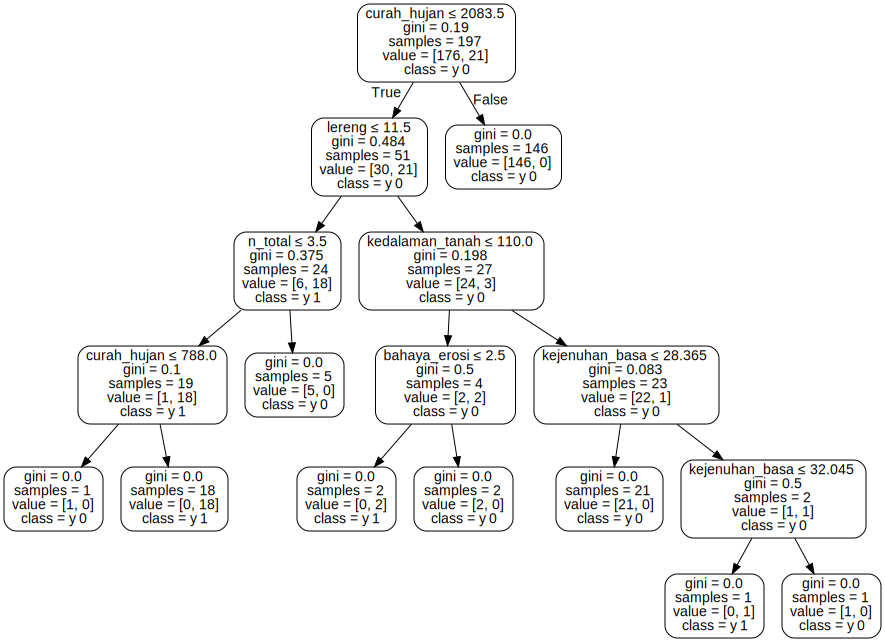

In [1365]:
feature_names = x_train.columns

dot_data = export_graphviz(model, out_file=None, feature_names=feature_names, class_names=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph